In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path
from sklearn.linear_model import lars_path
from sklearn.linear_model import LassoCV
from sklearn.linear_model import enet_path
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

<h1>The Lasso penalty</h1>

<p>This section shows how Lasso is able to select a group of the most relevant features in a dataset. The example use the Boston Housing dataset which is integrated in the sklearn package.</p>

<p>First of all, I use panda to load and analyse the dataset. </p>

In [2]:
from sklearn.datasets import load_boston

<p>The Boston dataset is small and contains 13 features, 506 samples and the output consist of the median value of owner-occupied homes in $1000's. This dataset is useful to regression problems.</p>

In [3]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.sample(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
201  0.03445  82.5   2.03   0.0  0.415  6.162   38.4  6.2700   2.0  348.0   
311  0.79041   0.0   9.90   0.0  0.544  6.122   52.8  2.6403   4.0  304.0   
296  0.05372   0.0  13.92   0.0  0.437  6.549   51.0  5.9604   4.0  289.0   
369  5.66998   0.0  18.10   1.0  0.631  6.683   96.8  1.3567  24.0  666.0   
136  0.32264   0.0  21.89   0.0  0.624  5.942   93.5  1.9669   4.0  437.0   
383  7.99248   0.0  18.10   0.0  0.700  5.520  100.0  1.5331  24.0  666.0   
245  0.19133  22.0   5.86   0.0  0.431  5.605   70.2  7.9549   7.0  330.0   
486  5.69175   0.0  18.10   0.0  0.583  6.114   79.8  3.5459  24.0  666.0   
90   0.04684   0.0   3.41   0.0  0.489  6.417   66.1  3.0923   2.0  270.0   
285  0.01096  55.0   2.25   0.0  0.389  6.453   31.9  7.3073   1.0  300.0   

     PTRATIO       B  LSTAT  MEDV  
201     14.7  393.77   7.43  24.1  
311     18.4  396.90   5.98  22.1  
296     16.0  392.85   7.39  27.1  
369     20.2  375.33   3.73  50.0  
136     21.2  378.25  16.90  17.4  
383     20.2  396.90  24.56  12.3  
245     19.1  389.13  18.46  18.5  
486     20.2  392.68  14.98  19.1  
90      17.8  392.18   8.81  22.6  
285     15.3  394.72   8.23  22.0

<p>The description of the dataset is the following:</p>

In [4]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<p>Next, we can observe the distribution of the data</p>

In [5]:
boston_df.describe().T

count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
MEDV     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
CRIM       3.677083   88.9762  
ZN        12.500000  100.0000  
INDUS     18.100000   27.7400  
CHAS       0.000000    1.0000  
NOX        0.624000    0.8710  
RM         6.623500    8.7800  
AGE       94.075000  100.0000  
DIS        5.188425   12.1265  
RAD       24.000000   24.0000  
TAX      666.000000  711.0000  
PTRATIO   20.200000   22.0000  
B        396.225000  396.9000  
LSTAT     16.955000   37.9700  
MEDV      25.000000   50.0000

<p>To apply the Lasso algorithm will be necessary to standardize the predictors X so that each column is centered and has unit variance</p>

<p>Now, I show the distribution of the target variable. The values of the output are distributed normally and, hava a few outliers</p>

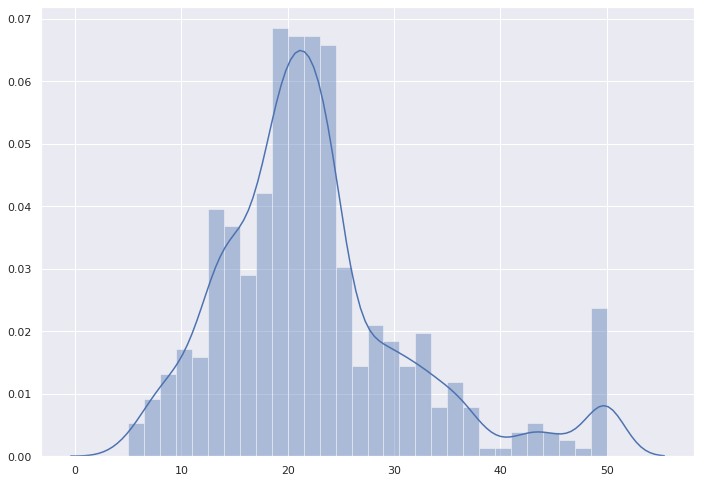

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston.target, bins=30)
plt.show()

<p>Now I plot the correlation matrix in order to identify the linear relationships between variables and the relationships between variables and output.</p>

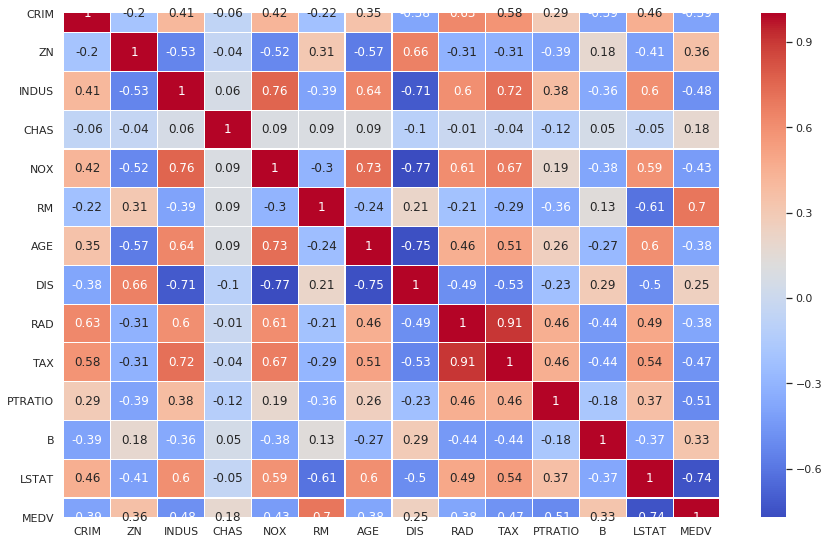

In [7]:
correlation_matrix = boston_df.corr().round(2)
sns.set(rc={'figure.figsize':(14.7,9.27)})
ax = sns.heatmap(data=correlation_matrix, cmap='coolwarm', annot=True, linewidths=.2)

<p>It can be seen that the RM feature has the stronger positive correlation (0.7) with the output MEDV. On the other hand, the variable LSTAT shows the stronger negative correlation (-0.74) with the target MEDV. Also, it is important to note the correlation between features. The features with a strong correlation are RAD and TAX, which have a correlation value of 0.91. And, the variable DIS shows a strong correlation with the variables NOX (-0.77) and AGE (-0.75) respectively.</p>

In [8]:
#Visualize dataframe
#sns.pairplot(boston_df, plot_kws={'alpha':0.6}, diag_kws={'bins': 30})
#plt.savefig('visualize_dataframe.png', bbox_inches='tight', dpi=100)

<p>Now, we can observe how the more relevant features (RM and LSTAT) vary wiht the output.</p>

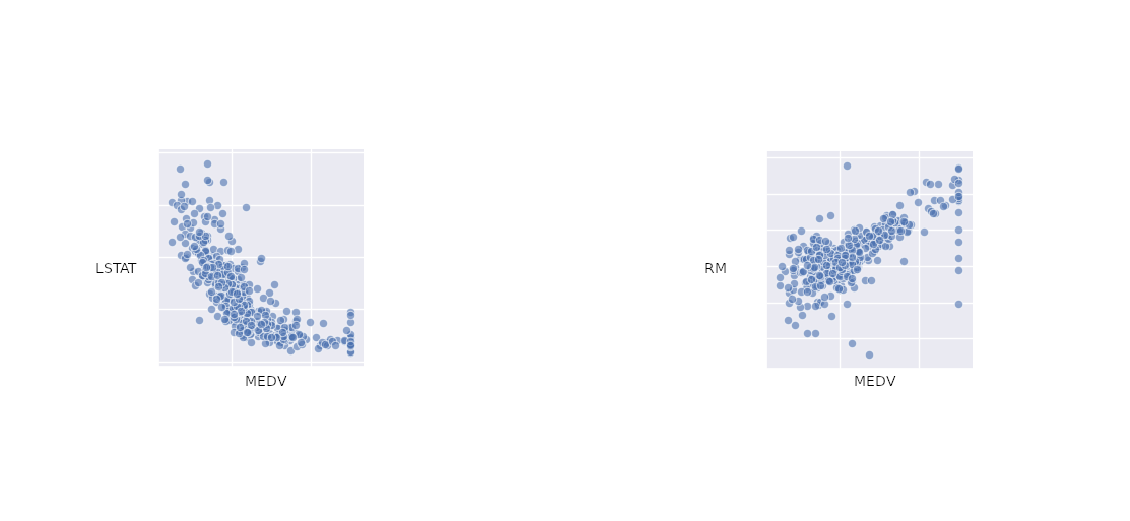

In [9]:
img_lstat = mpimg.imread('LSTAT_MEDV.png')
img_rm = mpimg.imread('RM_MEDV.png')
plt.figure(figsize = (20,20))
plt.subplot(121)
plt.axis('off')
imgplot1 = plt.imshow(img_lstat)
plt.subplot(122)
imgplot2 = plt.imshow(img_rm)
plt.axis('off')
plt.show()

<h1>Linear Regression</h1>

<p>Next, I want to compare the performance of the Lasso Regression with the performance of a linear regression model.</p>

<p>First, I split the data into training and test sets. I use the 80% of data for the training set and, the remaining 20% of data for the test set.</p>

In [10]:
X = boston['data']
Y = boston['target']

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=5)

print("Data shape on training set {}".format(X_train.shape))
print("Data shape on test set {}".format(X_test.shape))
print("Data shape on training output set {}".format(y_train.shape))
print("Data shape on test output set {}".format(y_test.shape))

Data shape on training set (404, 13)
Data shape on test set (102, 13)
Data shape on training output set (404,)
Data shape on test output set (102,)


<p>Second, it is important to standardize the data set. Without the standardization step the Lasso would depend on the units used to measure the predictors (see reference). So, we should standardize the training set then, we use the same parameters obtained in the training set to standardize the test set.</p>

In [11]:
scaler = StandardScaler()
scaler.fit(X_train)
x_train = scaler.transform(X_train)
x_test = scaler.transform(X_test)

<p>Now, we can apply a linear regression model and measure the performance on the trainign and on the test set. Also, we get the coefficients of the model, later we will use the linear regression coefficients to compare the coefficients obtained with the Lasso model.</p>

In [12]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
data_comparison = np.ones((2,4))

y_train_predict = lr.predict(x_train)
rmse = (mean_squared_error(y_train, y_train_predict))

print("The model performance for training set")
print("RMSE is {}".format(rmse))
print("\n")

data_comparison[0][0] = rmse

y_test_predict = lr.predict(x_test)
rmse = (mean_squared_error(y_test, y_test_predict))
print("The model performance for test set")
print("RMSE is {}".format(rmse))
print("\n")

data_comparison[0][1] = rmse

The model performance for training set
RMSE is 22.477090408387628


The model performance for test set
RMSE is 20.869292183770817




In [14]:
lr_train_score = lr.score(x_train, y_train)
lr_test_score = lr.score(x_test, y_test)

print("Linear regression train score {}".format(lr_train_score))
print("Linear regression test score {}".format(lr_test_score))

data_comparison[0][2] = lr_train_score
data_comparison[0][3] = lr_test_score

Linear regression train score 0.738339392059052
Linear regression test score 0.7334492147453076


In [15]:
lr.coef_

array([-1.13502719,  1.15814527,  0.00737057,  0.68709635, -1.82837001,
        2.36271879,  0.03166538, -3.06632775,  3.16621482, -2.21457852,
       -2.08600876,  1.0449511 , -4.17627077])

<h1>Lasso</h1>

<p>The next step is to create the Lasso model and to obtain the coefficients. Then, in order to compare the values for the coefficients I plot the coefficients for both models, linear regression and lasso regression.</p>

In [16]:
mdl = Lasso(alpha=0.8)
mdl.fit(x_train, y_train)
lasso_coef = mdl.coef_

Text(0, 0.5, 'Value of $w_i$')

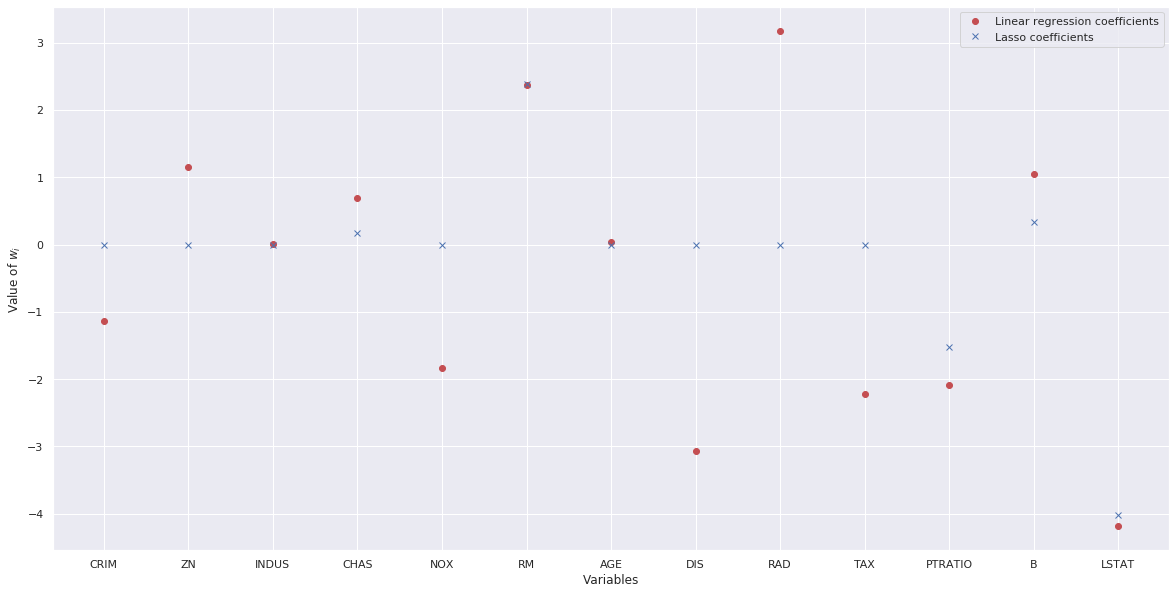

In [17]:
df2 = boston_df.drop(['MEDV'], axis=1)

plt.figure(figsize=(20,10))
plt.plot(lr.coef_, 'o' 'r', label="Linear regression coefficients")
plt.plot(mdl.coef_, 'x' 'b', label="Lasso coefficients")
plt.legend()
plt.xticks(np.linspace(0,12,13), list(df2.columns.values))
plt.xlabel("Variables")
plt.ylabel("Value of $w_i$")

<p>The graph above shows the values of the coefficients for both, linear regression and lasso regression. According with the graph, with alpha = 0.8 the Lasso model sets seven of the thirteen predictors to zero. Also, Lasso tends to shrink the coefficients to the other features towards zero.</p>
<p>The values of the coefficients for the most important features (LSTAT and RM) are the highest. This is consistent with the results obtained with the correlation matrix that we saw before. So, Lasso is able to select the more important features in a dataset. This is a small example, but it is useful to illustrate the concepts involved in Lasso model.</p>
<p>Variyng the value for alpha we can set more or less coefficients to zero. The figures below show how the coefficents are set to zero when alpha changes. With small values for alpha Lasso shrink more coefficients to zero, when alpha increases the Lasso allows to set more coefficients with a value different to zero.</p>

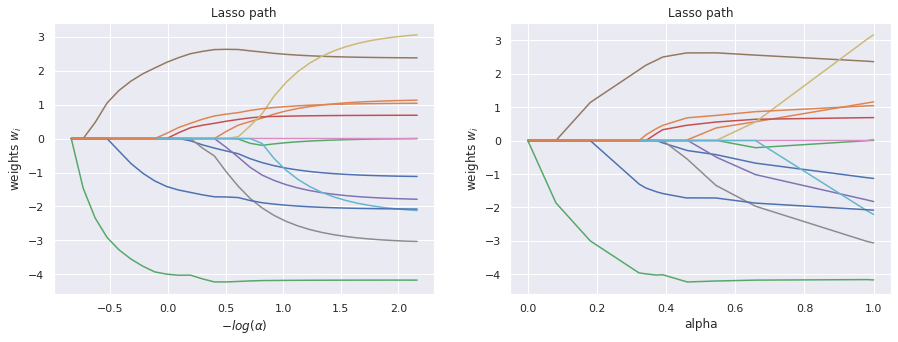

In [18]:
alphas, coef_path, _ = lasso_path(x_train,y_train, coef_init=mdl.coef_, n_alphas=30)
_, _, coefs = lars_path(x_train,y_train,method="lasso")

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(-np.log10(alphas), coef_path.T)
plt.xlabel(r'$-log(\alpha)$')
plt.ylabel('weights $w_i$')
plt.title('Lasso path');

plt.subplot(1,2,2)
plt.plot(xx, coefs.T)
plt.xlabel(r'alpha')
plt.ylabel('weights $w_i$')
plt.title('Lasso path');

plt.show()

<p>The next step is to measure the performance of the lasso model then we can compare the performance between the linear model and lasso model.</p>

In [19]:
y_train_predict = mdl.predict(x_train)
rmse = mean_squared_error(y_train, y_train_predict)

print("The model performance for training set")
print("RMSE is {}".format(rmse))
print("\n")

data_comparison[1][0] = rmse

y_test_predict = mdl.predict(x_test)
rmse = mean_squared_error(y_test, y_test_predict)
print("The model performance for test set")
print("RMSE is {}".format(rmse))
print("\n")

data_comparison[1][1] = rmse

The model performance for training set
RMSE is 22.47962288310184


The model performance for test set
RMSE is 20.776006933221332




In [20]:
mdl_train_score = mdl.score(x_train, y_train)
mdl_test_score = mdl.score(x_test, y_test)

print("Lasso train score {}".format(mdl_train_score))
print("Lasso test score {}".format(mdl_test_score))

data_comparison[1][2] = mdl_train_score
data_comparison[1][3] = mdl_test_score

Lasso train score 0.7383099109802612
Lasso test score 0.7346406905542466


In [21]:
df_comparison = pd.DataFrame(data_comparison, 
                             columns=['MSE training set', 'MSE test set', 'SCORE training set', 'SCORE test set'],
                            index = ['Linear Regression', 'Lasso Regression'])

df_comparison

MSE training set  MSE test set  SCORE training set  \
Linear Regression         22.477090     20.869292            0.738339   
Lasso Regression          22.479623     20.776007            0.738310   

                   SCORE test set  
Linear Regression        0.733449  
Lasso Regression         0.734641

<p>The table above shows that the performance for both models, the linear model and lasso model is similar.</p>

<h1>Cross-validation</h1>

<p>The alpha value controls the complexity of the model. In order to estimate the best value for alpha we can use cross validation. The figure below shows the cross-validation error curve for the Boston dataset. The dashed lines represent the scores plus and minus the standard error in the cross validated estimates of the prediction error.</p>

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


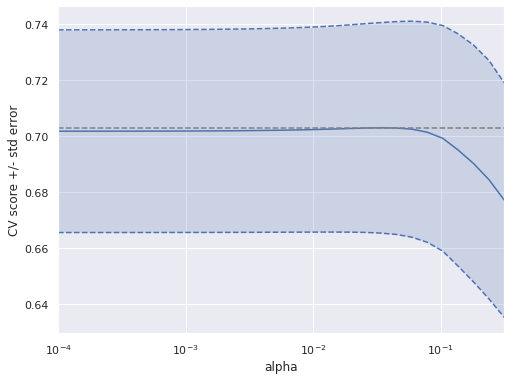

In [22]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha':alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(x_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

<h1>Elastic Net</h1>

<p>Lasso is not good to handle highly correlated variables. The coefficient paths tend to be erratic or show unstable behavior. To overcome these limitations we can use a regularization method which is called Elastic net.</p>

<p>With Elastic Net predictors which are highly correlated are selected together in their groups and they share approximately the same value. Elastic net also tends to shrink the values to zero.</p>

<p>The figure below compares the coefficients set for linear regression model, the lasso model and, the elastic net model.</p>

ElasticNet(alpha=0.8, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.715729


/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  app.launch_new_instance()
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will

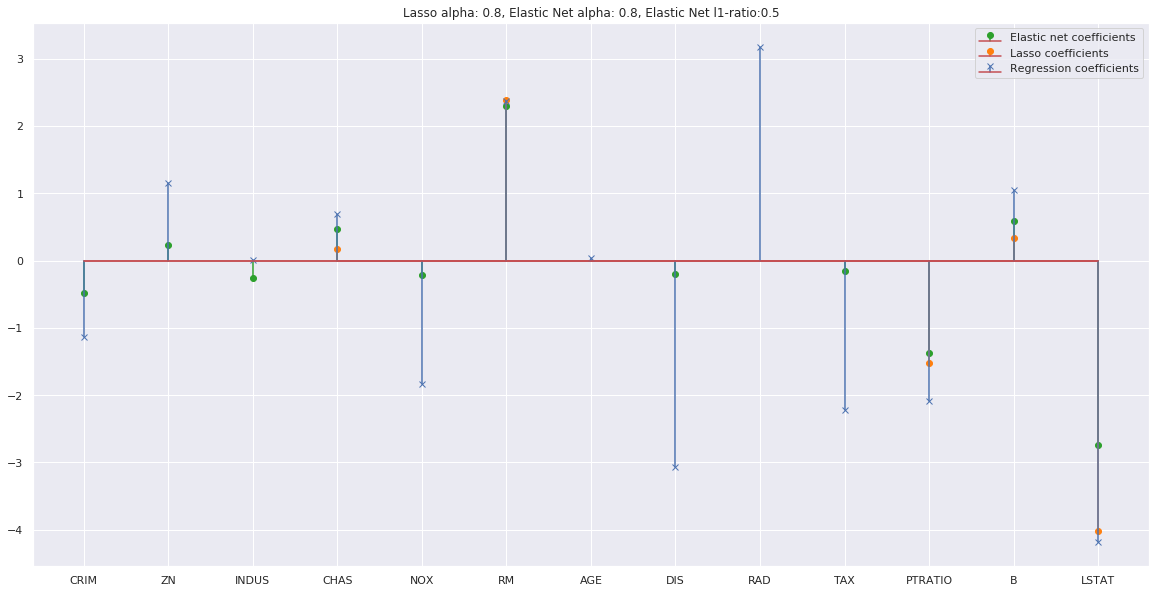

In [51]:
alpha = 0.8

lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(x_train, y_train).predict(x_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)

enet = ElasticNet(alpha=0.8, l1_ratio=0.5)

y_pred_enet = enet.fit(x_train, y_train).predict(x_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.figure(figsize=(20,10))
m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_ != 0],
                   markerfmt='o', label='Elastic net coefficients')
plt.setp([m, s], color="#2ca02c")
m, s, _ = plt.stem(np.where(lasso.coef_)[0], lasso.coef_[lasso.coef_ != 0],
                   markerfmt='o', label='Lasso coefficients')
plt.setp([m, s], color='#ff7f0e')
plt.stem(np.where(lr.coef_)[0], lr.coef_[lr.coef_ != 0], label='Regression coefficients',
         markerfmt='bx')

plt.xticks(np.linspace(0,12,13), list(df2.columns.values))
plt.legend(loc='best')
plt.title("Lasso alpha: %.1f, Elastic Net alpha: %.1f, Elastic Net l1-ratio:0.5"
          % (alpha, alpha))
plt.show()

ElasticNet(alpha=0.8, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r^2 on test data : 0.715729


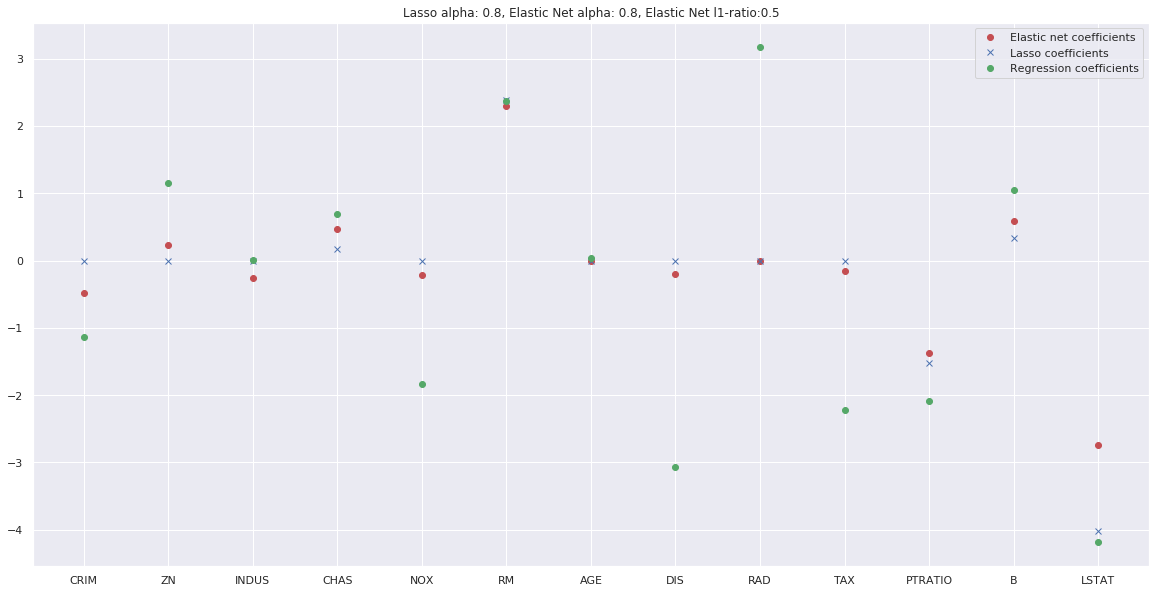

In [41]:
alpha = 0.8

lasso = Lasso(alpha=alpha)
y_pred_lasso = lasso.fit(x_train, y_train).predict(x_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
enet = ElasticNet(alpha=0.8, l1_ratio=0.5)

y_pred_enet = enet.fit(x_train, y_train).predict(x_test)
r2_score_enet = r2_score(y_test, y_pred_enet)
print(enet)
print("r^2 on test data : %f" % r2_score_enet)

plt.figure(figsize=(20,10))
plt.plot(enet.coef_, 'o' 'r', label="Elastic net coefficients")
plt.plot(lasso.coef_, 'x' 'b', label="Lasso coefficients")
plt.plot(lr.coef_, 'o' 'g', label="Regression coefficients")

plt.xticks(np.linspace(0,12,13), list(df2.columns.values))
plt.legend(loc='best')
plt.title("Lasso alpha: %.1f, Elastic Net alpha: %.1f, Elastic Net l1-ratio:0.5"
          % (alpha, alpha))
plt.show()

<p>The table below shows the coefficients for each model. Recall that the features which have a higher correlation are the groups RAD and TAX and, DIS and NOX</p>

<p></p>

In [32]:
df_coefs = pd.DataFrame(lr.coef_.reshape(1,13), index=['Linear Regression'], columns=list(df2.columns.values))
df_coefs_lasso = pd.DataFrame(lasso.coef_.reshape(1,13), index=['Lasso'], columns=list(df2.columns.values))
df_coefs_enet = pd.DataFrame(enet.coef_.reshape(1,13), index=['Elastic Net'], columns=list(df2.columns.values))

pd.concat([df_coefs, df_coefs_lasso, df_coefs_enet])

CRIM        ZN     INDUS      CHAS       NOX        RM  \
Linear Regression -1.135027  1.158145  0.007371  0.687096 -1.828370  2.362719   
Lasso             -0.000000  0.000000 -0.000000  0.177560 -0.000000  2.385886   
Elastic Net       -0.478728  0.225515 -0.259681  0.471988 -0.216145  2.301519   

                        AGE       DIS       RAD       TAX   PTRATIO         B  \
Linear Regression  0.031665 -3.066328  3.166215 -2.214579 -2.086009  1.044951   
Lasso             -0.000000 -0.000000 -0.000000 -0.000000 -1.518516  0.330622   
Elastic Net       -0.000000 -0.194887 -0.000000 -0.152487 -1.380558  0.583188   

                      LSTAT  
Linear Regression -4.176271  
Lasso             -4.025193  
Elastic Net       -2.743015

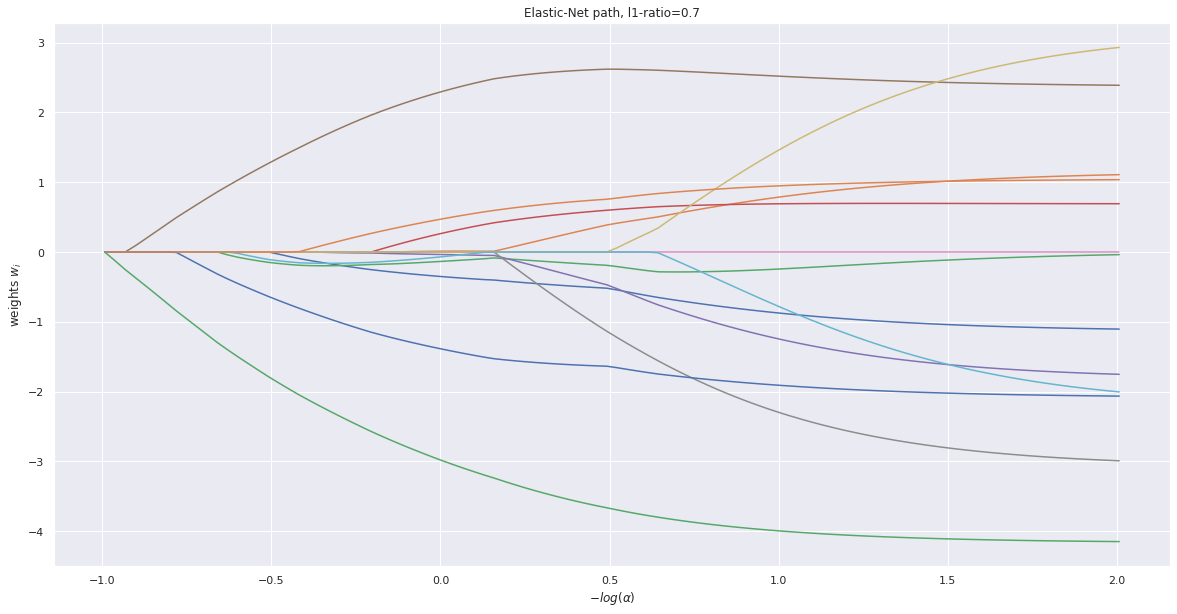

In [52]:
alphas, coefs_path, _ = enet_path(x_train, y_train, l1_ratio=0.7)

plt.figure(figsize=(20,10))
plt.plot(-np.log10(alphas), coefs_path.T)
plt.xlabel(r'$-log(\alpha)$')
plt.ylabel('weights $w_i$')
plt.title('Elastic-Net path, l1-ratio=0.7');

<h1>Synthetic dataset</h1>

<p>In this section I will build a synthetic dataset in order to test the two stages method proposed in 2. </p>

In [53]:
X1 = np.random.uniform(low=-0.5, high=0.5, size=(100,3))
X2 = np.random.uniform(low=-0.5, high=0.5, size=(100,25))
#X1 = np.random.normal(loc=0, scale=1, size=(100,3))
#X2 = np.random.normal(loc=0, scale=1, size=(100,25))
#X1 = np.random.randn(100,3)
#X2 = np.random.randn(100,25)

X = np.insert(X1, [2], X2, axis=1)

#X = np.random.uniform(low=-0.5, high=0.5, size=(30,23))
#X = np.random.normal(loc=0, scale=1, size=(30,23))

s = np.ones((100,1))

error = 0.01#np.random.rand()
error_corr = 0.01 * error

group1 = np.ones((100,4))
group2 = np.ones((100,4))
group3 = np.ones((100,4))
#group1 = np.ones((30,9))
#group2 = np.ones((30,9))
#group3 = np.ones((30,9))

for row in range(group1.shape[0]):
    for column in range(group1.shape[1]):
        group1[row][column] *= X[row][0]
        group1[row][column] += error_corr
        
for row in range(group2.shape[0]):
    for column in range(group2.shape[1]):
        group2[row][column] *= X[row][1]
        group2[row][column] += error_corr
        
for row in range(group3.shape[0]):
    for column in range(group3.shape[1]):
        group3[row][column] *= X[row][2]
        group3[row][column] += error_corr

print(group1.shape)
X_data = np.insert(X, [1], group1, axis=1)
X_data = np.insert(X_data, [6], group2, axis=1)
X_data = np.insert(X_data, [11], group3, axis=1)

print(X_data.shape)

beta = np.zeros((40,1))
beta[0:15] = 1

y = -np.sign((X_data.dot(beta)) + error)

(100, 4)
(100, 40)


In [54]:
df = pd.DataFrame(X_data)

dfy = pd.DataFrame(y)
#df3 = pd.concat([df,dfy], axis=1)
#df3.sample(10)

df['output'] = y
df.sample(10)

0         1         2         3         4         5         6  \
99  0.100878  0.100978  0.100978  0.100978  0.100978 -0.426126 -0.426026   
70 -0.343104 -0.343004 -0.343004 -0.343004 -0.343004  0.200623  0.200723   
52  0.191238  0.191338  0.191338  0.191338  0.191338 -0.330114 -0.330014   
62 -0.401869 -0.401769 -0.401769 -0.401769 -0.401769 -0.177131 -0.177031   
53  0.208858  0.208958  0.208958  0.208958  0.208958  0.416521  0.416621   
77  0.075144  0.075244  0.075244  0.075244  0.075244 -0.363993 -0.363893   
25  0.248105  0.248205  0.248205  0.248205  0.248205 -0.396589 -0.396489   
31  0.369849  0.369949  0.369949  0.369949  0.369949  0.303983  0.304083   
89  0.328988  0.329088  0.329088  0.329088  0.329088 -0.295024 -0.294924   
22 -0.162808 -0.162708 -0.162708 -0.162708 -0.162708 -0.490120 -0.490020   

           7         8         9  ...        31        32        33        34  \
99 -0.426026 -0.426026 -0.426026  ...  0.098033 -0.412773 -0.414575 -0.058399   
70  0.200723  0.200723  0.200723  ...  0.246257 -0.183450 -0.417198 -0.238311   
52 -0.330014 -0.330014 -0.330014  ... -0.329907 -0.159727 -0.408047  0.403958   
62 -0.177031 -0.177031 -0.177031  ... -0.213717 -0.372591 -0.485324 -0.095374   
53  0.416621  0.416621  0.416621  ... -0.311967 -0.068889  0.140660 -0.215593   
77 -0.363893 -0.363893 -0.363893  ... -0.431037 -0.233567 -0.091044  0.127288   
25 -0.396489 -0.396489 -0.396489  ...  0.341896 -0.199782  0.010989 -0.359169   
31  0.304083  0.304083  0.304083  ... -0.319135  0.434151  0.037693  0.454300   
89 -0.294924 -0.294924 -0.294924  ...  0.458857 -0.468363  0.461419 -0.168427   
22 -0.490020 -0.490020 -0.490020  ... -0.054535  0.040919  0.197931 -0.185725   

          35        36        37        38        39  output  
99  0.012990  0.191237  0.331071  0.183560 -0.038598     1.0  
70  0.247572  0.453889  0.003065  0.361051  0.023720    -1.0  
52  0.450193  0.402607 -0.464140 -0.349137  0.097485    -1.0  
62  0.495115 -0.214746  0.027806 -0.330110 -0.130119     1.0  
53 -0.102272 -0.108206  0.436896 -0.298879 -0.338539    -1.0  
77  0.456560 -0.009704  0.427213  0.336742 -0.118699    -1.0  
25  0.480592 -0.099796 -0.048801  0.030780 -0.335030     1.0  
31 -0.239494 -0.456983 -0.310796 -0.267514 -0.484768    -1.0  
89  0.495054  0.431803 -0.221784 -0.354386  0.324401     1.0  
22  0.022848  0.225337 -0.180239 -0.207077 -0.434948     1.0  

[10 rows x 41 columns]

In [55]:
df.describe().T

count      mean       std       min       25%       50%       75%  \
0       100.0  0.026589  0.273004 -0.495556 -0.207510  0.060077  0.240600   
1       100.0  0.026689  0.273004 -0.495456 -0.207410  0.060177  0.240700   
2       100.0  0.026689  0.273004 -0.495456 -0.207410  0.060177  0.240700   
3       100.0  0.026689  0.273004 -0.495456 -0.207410  0.060177  0.240700   
4       100.0  0.026689  0.273004 -0.495456 -0.207410  0.060177  0.240700   
5       100.0 -0.002372  0.319596 -0.496723 -0.282520 -0.003411  0.273199   
6       100.0 -0.002272  0.319596 -0.496623 -0.282420 -0.003311  0.273299   
7       100.0 -0.002272  0.319596 -0.496623 -0.282420 -0.003311  0.273299   
8       100.0 -0.002272  0.319596 -0.496623 -0.282420 -0.003311  0.273299   
9       100.0 -0.002272  0.319596 -0.496623 -0.282420 -0.003311  0.273299   
10      100.0 -0.004153  0.292392 -0.494145 -0.283537 -0.009938  0.238593   
11      100.0 -0.004053  0.292392 -0.494045 -0.283437 -0.009838  0.238693   
12      100.0 -0.004053  0.292392 -0.494045 -0.283437 -0.009838  0.238693   
13      100.0 -0.004053  0.292392 -0.494045 -0.283437 -0.009838  0.238693   
14      100.0 -0.004053  0.292392 -0.494045 -0.283437 -0.009838  0.238693   
15      100.0 -0.020276  0.294714 -0.495953 -0.271814 -0.015595  0.217284   
16      100.0  0.035512  0.276548 -0.472239 -0.173600  0.007295  0.222608   
17      100.0  0.029594  0.285585 -0.492840 -0.202901  0.042253  0.304986   
18      100.0 -0.037255  0.299408 -0.472563 -0.326566 -0.050967  0.240852   
19      100.0 -0.018372  0.279200 -0.491649 -0.251954 -0.048742  0.230709   
20      100.0 -0.030427  0.250121 -0.492417 -0.228775 -0.051914  0.159180   
21      100.0 -0.026786  0.286450 -0.482454 -0.256950 -0.067367  0.182575   
22      100.0  0.048375  0.285556 -0.499399 -0.183139  0.067712  0.287591   
23      100.0 -0.007891  0.270516 -0.486191 -0.219890  0.009665  0.190246   
24      100.0  0.008303  0.279439 -0.490377 -0.247126  0.028790  0.235857   
25      100.0 -0.055864  0.295774 -0.495936 -0.338616 -0.109570  0.206700   
26      100.0 -0.020344  0.300093 -0.494158 -0.276476 -0.046638  0.247637   
27      100.0 -0.029811  0.280388 -0.490947 -0.252524 -0.058892  0.191429   
28      100.0 -0.022564  0.276957 -0.490603 -0.247218 -0.038044  0.219418   
29      100.0  0.018123  0.287407 -0.461435 -0.210725  0.019554  0.253240   
30      100.0  0.022806  0.276952 -0.499446 -0.212472  0.048218  0.266464   
31      100.0 -0.005196  0.288964 -0.489535 -0.271008 -0.001104  0.247213   
32      100.0  0.005301  0.296755 -0.495928 -0.230683 -0.018385  0.272916   
33      100.0 -0.034803  0.291868 -0.495428 -0.276922 -0.026139  0.165833   
34      100.0  0.008318  0.287321 -0.495434 -0.226935 -0.053825  0.260048   
35      100.0  0.019366  0.296016 -0.494650 -0.237018  0.028988  0.247956   
36      100.0 -0.020033  0.290249 -0.494803 -0.270008 -0.026363  0.256608   
37      100.0  0.055005  0.273217 -0.470538 -0.164201  0.074561  0.297009   
38      100.0  0.059216  0.282823 -0.487679 -0.208101  0.083035  0.318371   
39      100.0  0.005708  0.272961 -0.484768 -0.219090 -0.019034  0.225993   
output  100.0 -0.140000  0.995140 -1.000000 -1.000000 -1.000000  1.000000   

             max  
0       0.497361  
1       0.497461  
2       0.497461  
3       0.497461  
4       0.497461  
5       0.495386  
6       0.495486  
7       0.495486  
8       0.495486  
9       0.495486  
10      0.497652  
11      0.497752  
12      0.497752  
13      0.497752  
14      0.497752  
15      0.498898  
16      0.485933  
17      0.497853  
18      0.499701  
19      0.490317  
20      0.421624  
21      0.499309  
22      0.479511  
23      0.499145  
24      0.497474  
25      0.467699  
26      0.492683  
27      0.495642  
28      0.489359  
29      0.488277  
30      0.499739  
31      0.499317  
32      0.489540  
33      0.492673  
34      0.499845  
35      0.495115  
36      0.481227  
37      0.498143  
38      0.488906  
39      0.478

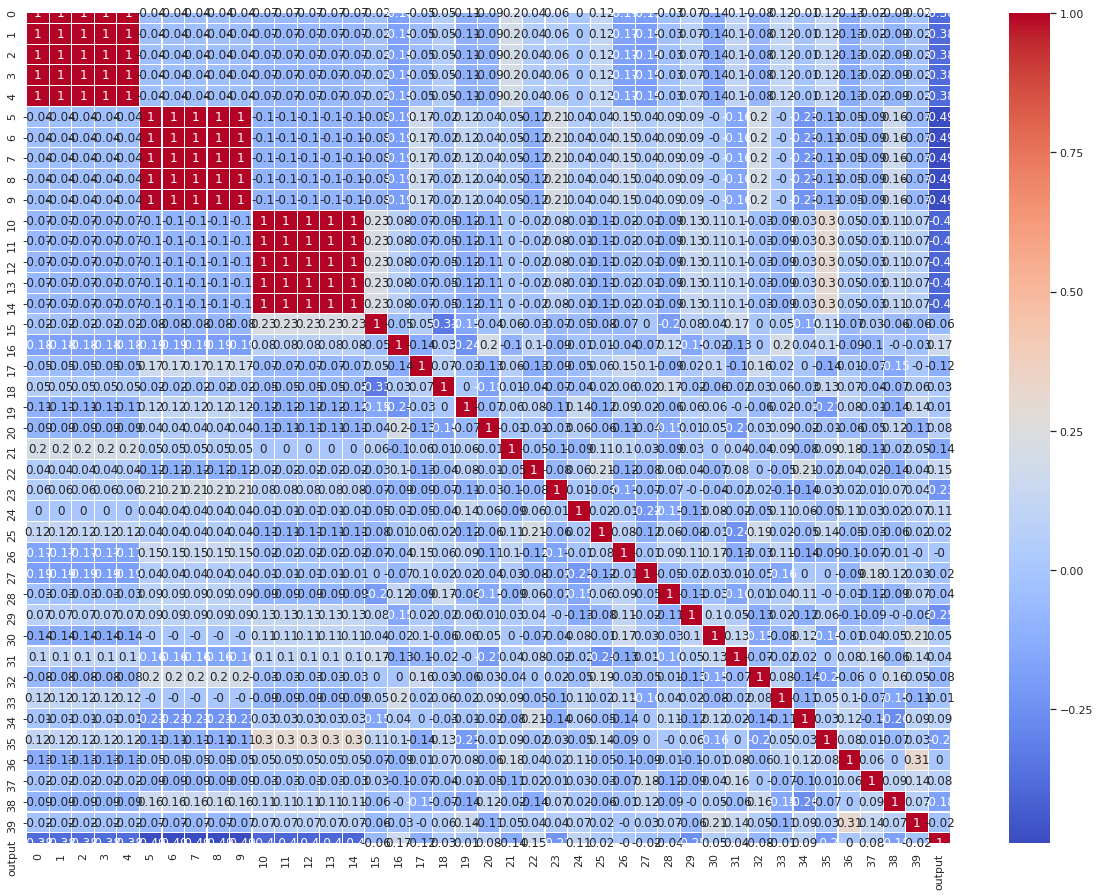

In [56]:
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(20.7,15.27)})
ax = sns.heatmap(data=correlation_matrix, cmap='coolwarm', linewidths=.2, annot=True)

In [57]:
def alphal1ratio_to_taumu(alpha, l1_ratio):
    tau = alpha*l1_ratio
    mu = (tau - alpha) / 2
    
    return tau, mu

def taumu_to_alphal1ratio(tau, mu):
    alpha = 2*mu + tau
    l1_ratio = tau/alpha
    return alpha, l1_ratio

In [58]:
mu = 0
#taus = np.logspace(-1,-4,5)
taus = np.linspace(0.1,0.5,10)

alphas = []
l1_ratios = []

for tau in taus:
    alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
    alphas.append(alpha)
    l1_ratios.append(l1_ratio)
    
#alphas = np.linspace(1,10,20)
#alphas = np.linspace(0.0001,0.9999,20)
#l1_ratios = np.linspace(0.0001,0.9999,20)

print(alphas)
print(l1_ratios)

tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1_ratios}]

enet = ElasticNet(max_iter = 1000)

scores = []
coefs_found = []
best_params = []

K = 3
kf = StratifiedKFold(n_splits=K, shuffle=True)
kf.get_n_splits(X_data,y)
for train_index, test_index in kf.split(X_data, y):
    x_train, x_test = X_data[train_index], X_data[test_index]
    y_train, y_test = y[train_index], y[test_index]

    clf = GridSearchCV(enet, tuned_parameters, cv=5)
    clf.fit(x_train, y_train)

    coefs = clf.best_estimator_.coef_
    params = clf.best_params_
    score = clf.score(x_test, y_test)

    print(coefs)
    #coefs_found += list(coefs)
    coefs_found.append(coefs)
    best_params.append(params) 
    scores.append(score)
    
max_score_index = np.where(scores == np.amax(scores))
print(max_score_index)
print("Best parameters after cross validation with u1")
print(best_params[max_score_index[0][0]])

print("Performace")
print(scores[max_score_index[0][0]])

cfs = np.asarray(coefs_found[max_score_index[0][0]])
numCoefs1 = np.array(cfs[cfs != 0])
print(numCoefs1.shape)

max_score_index

[0.1, 0.14444444444444446, 0.18888888888888888, 0.23333333333333334, 0.2777777777777778, 0.32222222222222224, 0.3666666666666667, 0.4111111111111111, 0.4555555555555556, 0.5]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[-2.41360631e-01 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.71501237e-01 -0.00000000e+00 -1.45036007e-16
 -1.45036007e-16 -0.00000000e+00 -5.33599244e-01 -9.59023426e-16
 -1.59837238e-16 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00]


/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[-0.         -0.         -0.         -0.         -0.         -0.86116844
 -0.         -0.         -0.         -0.         -0.         -0.
 -0.         -0.         -0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.          0.         -0.         -0.         -0.         -0.
  0.         -0.         -0.         -0.          0.         -0.
  0.         -0.         -0.          0.        ]
[-1.48960864e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -6.52701141e-01 -2.42555914e-16 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -3.14757059e-01 -4.23486731e-16
 -1.41162244e-16 -1.41162244e-16 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00

/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


(array([2]),)

In [25]:
import os
import tarfile
import urllib.request as urllib
import pandas as pd

from matplotlib.colors import ListedColormap
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import lasso_path
from sklearn import preprocessing
from sklearn.svm import l1_min_c
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [26]:
# Download the full data file from the slipguru server
host = 'http://www.slipguru.unige.it/Data/'
filename = 'TCGA-PANCAN-HiSeq-801x20531.tar.gz'
#urllib.urlretrieve (host+filename, filename)

# Extract the tar.gz archive into a folder
tar = tarfile.open(filename)
tar.extractall()
tar.close()

# Get the folder name
path = filename.split('.')[0]

In [27]:
data = pd.read_csv(os.path.join(path, 'data.csv'), header=0, index_col=0)
print("Data matrix shape: {}".format(data.shape))
data.head()

Data matrix shape: (801, 20531)


gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0  7.175175   
sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0  6.816049   
sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0  6.972130   
sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0  7.843375   
sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0  6.566967   

            gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
sample_0  0.591871     0.0     0.0  ...    4.926711    8.210257    9.723516   
sample_1  0.000000     0.0     0.0  ...    4.593372    7.323865    9.740931   
sample_2  0.452595     0.0     0.0  ...    5.125213    8.127123   10.908640   
sample_3  0.434882     0.0     0.0  ...    6.076566    8.792959   10.141520   
sample_4  0.360982     0.0     0.0  ...    5.996032    8.891425   10.373790   

          gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  \
sample_0    7.220030    9.119813   12.003135    9.650743    8.921326   
sample_1    6.256586    8.381612   12.674552   10.517059    9.397854   
sample_2    5.401607    9.911597    9.045255    9.788359   10.090470   
sample_3    8.942805    9.601208   11.392682    9.694814    9.684365   
sample_4    7.181162    9.846910   11.922439    9.217749    9.461191   

          gene_20529  gene_20530  
sample_0    5.286759         0.0  
sample_1    2.094168         0.0  
sample_2    1.683023         0.0  
sample_3    3.292001         0.0  
sample_4    5.110372         0.0  

[5 rows x 20531 columns]

In [28]:
data.sample(10)

gene_0    gene_1    gene_2    gene_3     gene_4  gene_5    gene_6  \
sample_584     0.0  4.557778  4.587227  6.661465   9.278266     0.0  8.791235   
sample_414     0.0  3.590818  4.063451  6.962711   9.668421     0.0  7.260233   
sample_677     0.0  4.087463  3.786596  6.385845   9.544964     0.0  8.062856   
sample_736     0.0  3.910176  3.047661  5.887194   9.152794     0.0  8.536169   
sample_594     0.0  1.143785  1.016853  6.723204   9.706436     0.0  6.454865   
sample_318     0.0  4.463655  3.138044  6.686599   9.514252     0.0  9.341457   
sample_134     0.0  3.004340  2.366700  6.672256   9.927494     0.0  7.515361   
sample_140     0.0  4.152776  4.387459  6.354988   8.846468     0.0  7.307957   
sample_432     0.0  4.010046  4.370673  6.879779   9.821913     0.0  7.837590   
sample_745     0.0  3.487692  4.071145  8.695938  10.396230     0.0  8.745140   

              gene_7  gene_8  gene_9  ...  gene_20521  gene_20522  gene_20523  \
sample_584  0.993566     0.0     0.0  ...    6.549454    9.131754   10.415446   
sample_414  1.508986     0.0     0.0  ...    6.935224    9.256426   10.205928   
sample_677  0.000000     0.0     0.0  ...    6.332708    9.317865   10.477961   
sample_736  1.977573     0.0     0.0  ...    5.970509    8.200158    9.603296   
sample_594  0.000000     0.0     0.0  ...    6.031000    9.699349    9.689628   
sample_318  2.779008     0.0     0.0  ...    5.972582    7.752916   10.533164   
sample_134  0.000000     0.0     0.0  ...    5.751116    8.875335   10.283366   
sample_140  0.770702     0.0     0.0  ...    6.427670    9.455629    9.671497   
sample_432  0.756255     0.0     0.0  ...    6.098683    9.227556    9.814204   
sample_745  0.000000     0.0     0.0  ...    4.707580    8.264368   10.210915   

            gene_20524  gene_20525  gene_20526  gene_20527  gene_20528  \
sample_584    5.987278    9.897731   10.564988   10.917820   10.129193   
sample_414    0.000000    9.561452   11.896771   10.775553    9.777137   
sample_677    4.643856   10.069047   11.014718   10.731149   10.009829   
sample_736    3.542444    9.586164   11.825690   10.335011    9.419745   
sample_594    3.077909    9.182104   11.779424    9.963601    8.941209   
sample_318    2.055682    9.658920   11.651325   10.557550    8.991221   
sample_134    7.830889    8.985520   10.816144   10.210964    9.349281   
sample_140    6.133333    9.934549   11.689264    9.695653    9.361207   
sample_432    7.826688   10.585235   11.480427    9.869450   10.793376   
sample_745    0.000000    8.446124   12.416890   10.176086    9.326966   

            gene_20529  gene_20530  
sample_584    3.447685         0.0  
sample_414    3.288196         0.0  
sample_677    7.345183         0.0  
sample_736    2.928143         0.0  
sample_594   10.046674         0.0  
sample_318    5.819678         0.0  
sample_134    2.682888         0.0  
sample_140    5.414788         0.0  
sample_432    3.816876         0.0  
sample_745    3.713234         0.0  

[10 rows x 20531 columns]

In [29]:
data.isnull().sum()

gene_0        0
gene_1        0
gene_2        0
gene_3        0
gene_4        0
             ..
gene_20526    0
gene_20527    0
gene_20528    0
gene_20529    0
gene_20530    0
Length: 20531, dtype: int64

In [30]:
data.describe().T

count       mean       std       min        25%        50%  \
gene_0      801.0   0.026642  0.136850  0.000000   0.000000   0.000000   
gene_1      801.0   3.010909  1.200828  0.000000   2.299039   3.143687   
gene_2      801.0   3.095350  1.065601  0.000000   2.390365   3.127006   
gene_3      801.0   6.722305  0.638819  5.009284   6.303346   6.655893   
gene_4      801.0   9.813612  0.506537  8.435999   9.464466   9.791599   
...           ...        ...       ...       ...        ...        ...   
gene_20526  801.0  11.742228  0.670371  9.045255  11.315857  11.749802   
gene_20527  801.0  10.155271  0.580569  7.530141   9.836525  10.191207   
gene_20528  801.0   9.590726  0.563849  7.864533   9.244219   9.566511   
gene_20529  801.0   5.528177  2.073859  0.593975   4.092385   5.218618   
gene_20530  801.0   0.095411  0.364529  0.000000   0.000000   0.000000   

                  75%        max  
gene_0       0.000000   1.482332  
gene_1       3.883484   6.237034  
gene_2       3.802534   6.063484  
gene_3       7.038447  10.129528  
gene_4      10.142324  11.355621  
...               ...        ...  
gene_20526  12.177852  13.715361  
gene_20527  10.578561  11.675653  
gene_20528   9.917888  12.813320  
gene_20529   6.876382  11.205836  
gene_20530   0.000000   5.254133  

[20531 rows x 8 columns]

In [31]:
labels = pd.read_csv(os.path.join(path, 'labels.csv'), header=0, index_col=0)
print("The labels corresponding to tumors are: {}".format(np.unique(labels.values)))

The labels corresponding to tumors are: ['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']


In [32]:
X_reduced = PCA(n_components=2).fit_transform(data.values)

le = LabelEncoder()
le.fit(labels.values)


/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LabelEncoder()

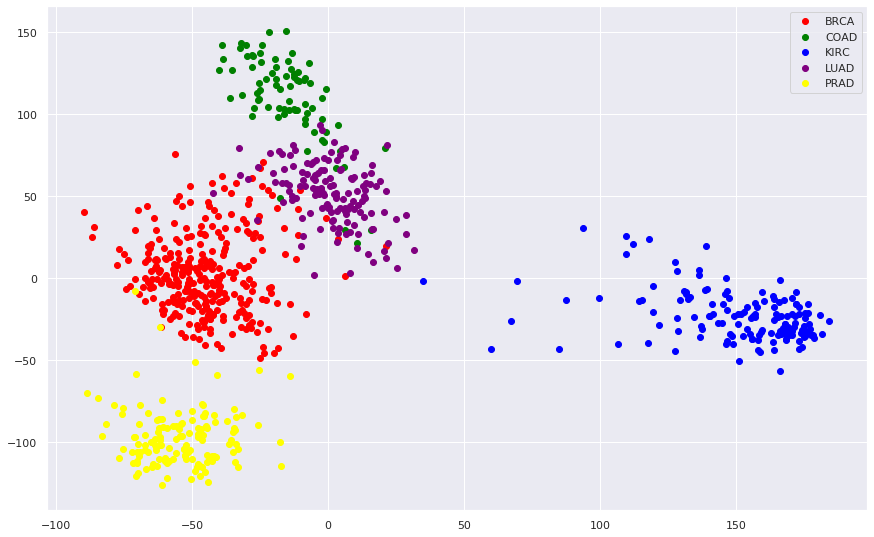

In [33]:
colors = np.array(["red", "green", "blue", "purple", "yellow"])
classes = np.unique(labels.values)

fig, ax = plt.subplots()
for ii in range(len(classes)):
    x = X_reduced[:,0]
    y = X_reduced[:,1]
    
    l = labels.values.reshape(801,)
    sel = l == classes[ii]
    
    newX = x[sel]
    newY = y[sel]
    ax.scatter(newX, newY, c=colors[ii], label=classes[ii])
    
ax.legend()
ax.grid(True)
plt.show()

In [34]:
def alphal1ratio_to_taumu(alpha, l1_ratio):
    tau = alpha*l1_ratio
    mu = (tau - alpha) / 2
    
    return tau, mu

def taumu_to_alphal1ratio(tau, mu):
    alpha = 2*mu + tau
    l1_ratio = tau/alpha
    return alpha, l1_ratio


In [63]:
X = data.values
y = labels.values

le = LabelEncoder()
le.fit(y.ravel())
y_encoder = le.transform(y.ravel())

mu = 0.001
taus = np.logspace(-1,5,5)

alphas = []
l1_ratios = []
#alphas = np.logspace(-0.01, -0.7, 5)
#l1_ratio = np.logspace(-0.01,-0.7,5)

for tau in taus:
    alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
    alphas.append(alpha)
    l1_ratios.append(l1_ratio)
    
print(alphas)
print(l1_ratios)
tuned_parameters = [{'alpha': alphas, 'l1_ratio': l1_ratios}]

enet = ElasticNet(max_iter = 1000)

scores = []
coefs_found = []
best_params = []

K = 3
kf = StratifiedKFold(n_splits=K, shuffle=True)

for train_index, test_index in kf.split(X, y_encoder):
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y_encoder[train_index], y_encoder[test_index]
    
    clf = GridSearchCV(enet, tuned_parameters, cv=5)
    clf.fit(x_train, y_train)
    
    coefs = clf.best_estimator_.coef_
    params = clf.best_params_
    score = clf.score(x_test, y_test)
    
    coefs_found += list(coefs)
    best_params.append(params) 
    scores.append(score)
    
print(scores)
print(coefs_found)

    
print("Best parameters set found on development set:")
print()
print(best_params)

print("Best scores set found on development set:")
print()
print(scores)

print("Best Coefs set found on development set:")
print()
print(coefs_found)


#print()
#print(clf.best_params_)
#print()
#print("Grid scores on set:")
#print()
#means = clf.cv_results_['mean_test_score']
#stds = clf.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, clf.cv_results_['params']):
 #   print("%0.3f (+/-%0.03f) for %r"
  #        % (mean, std * 2, params))

[0.10200000000000001, 3.1642776601683793, 100.002, 3162.2796601683795, 100000.002]
[0.9803921568627451, 0.9993679442151441, 0.999980000399992, 0.999999367544868, 0.9999999800000005]
[0.9635869472017309, 0.9722391369431247, 0.9741545010768187]
[0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0, -0.0, -0.0, 0.0, 0.

In [79]:
max_score_index = np.where(scores == np.amax(scores))

print("Best parameters after cross validation")
print(best_params[max_score_index[0][0]])

Best parameters after cross validation
{'alpha': 0.10200000000000001, 'l1_ratio': 0.9803921568627451}


In [80]:
tau, mu = alphal1ratio_to_taumu(alpha, l1_ratio)

print(alphal1ratio_to_taumu(alpha, l1_ratio))

(100000.0, -0.000999999996565748)


In [93]:
def nested_split(tau, mu):
    alpha, l1_ratio = taumu_to_alphal1ratio(tau, mu)
    
    enet = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter = 10000)
    enet.fit(X, y_encoder)

    numCoefs = np.array(enet.coef_ != 0)
    print(numCoefs.shape)

In [94]:
nested_split(tau, 1e6)

(20531,)


/home/henrysabogal/anaconda3/envs/Bioinformatics/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3745.103963116416, tolerance: 0.18753283395755305
  positive)
